In [7]:
# NB!!!
# Basta avviare una volta sola ad inizio sessione.
# Drive verrà montato per tutto il notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




---
# **Analisi di una piantagione**

---



In [9]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/trees.csv')
df

,Id,Circonferenza,Altezza,Volume
0,1,8.3,70,10.3
1,2,8.6,65,10.3
2,3,8.8,63,10.2
3,4,10.5,72,16.4
4,5,10.7,81,18.8
5,6,10.8,83,19.7
6,7,11.0,66,15.6
7,8,11.0,75,18.2
8,9,11.1,80,22.6
9,10,11.2,75,19.9


Accesso ai dati

In [10]:
i = df["Id"].to_numpy()
c = df["Circonferenza"].to_numpy()
a = df["Altezza"].to_numpy()
v = df["Volume"].to_numpy()

Relazioni tra i dati

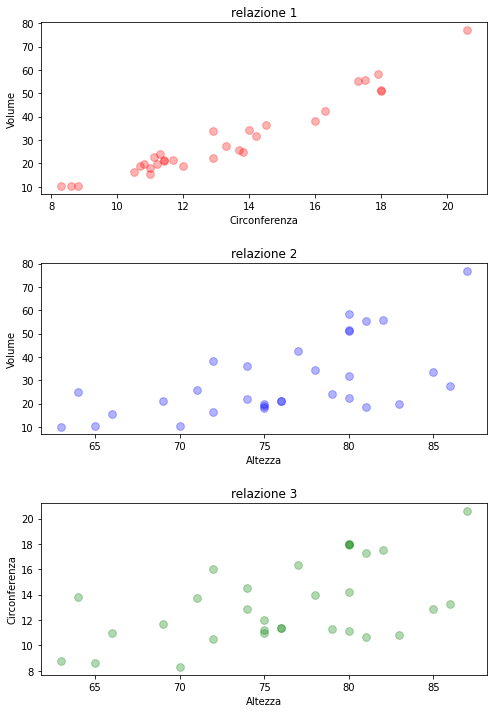

In [11]:
# imposta il layout di stamapa
plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.4) # spaziatura verticale


# subplot 1
plot_c_v = plt.subplot(3, 1, 1)
plot_c_v.set_title("relazione 1")
plot_c_v.set(xlabel='Circonferenza', ylabel='Volume')
plot_c_v.scatter(c, v,  color="red", alpha=0.3, s=60)

# subplot 2
plot_a_v = plt.subplot(3, 1, 2)
plot_a_v.set_title("relazione 2")
plot_a_v.set(xlabel='Altezza', ylabel='Volume')
plot_a_v.scatter(a, v, color="blue", alpha=0.3, s=60)

# subplot 3
plot_a_c = plt.subplot(3, 1, 3)
plot_a_c.set_title("relazione 3")
plot_a_c.set(xlabel='Altezza', ylabel='Circonferenza')
plot_a_c.scatter(a, c, color="green", alpha=0.3, s=60)


# plot 
plt.show()





---

# **Analisi delle strutture alberghiere**

fonte dati: http://www.datiopen.it/it

---





Preparazione dei dati

In [ ]:
def load_data_frames() -> pd.DataFrame:
  path_arrivi = '/content/drive/MyDrive/Colab Notebooks/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione.csv'
  path_presenze = '/content/drive/MyDrive/Colab Notebooks/datasets/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione.csv'
  
  # specificare la modalità in cui sono separate 
  df_arrivi   = pd.read_csv(path_arrivi, sep=';')
  df_presenze = pd.read_csv(path_presenze, sep=';')

  # controllare se i due dataframe hanno gli stessi valori sulle colonne interessate
  check_anno = df_arrivi["Anno"] == df_presenze["Anno"]
  assert (np.all(check_anno) != False), "Gli anni non sono uguali"

  check_regione = df_arrivi["Regione"] == df_presenze["Regione"]
  assert (np.all(check_regione) != False), "Le regioni non sono uguali"


  # print(df_arrivi)
  # print(df_presenze)

  # unire una tabella 
  return df_arrivi.join(df_presenze["Presenze"])




df_alberghi = load_data_frames()
display(df_alberghi)

In [27]:
regioni = df_alberghi["Regione"].to_numpy()
anni = df_alberghi["Anno"].to_numpy()
arrivi = df_alberghi["Arrivi"].to_numpy()
presenze = df_alberghi["Presenze"].to_numpy()

Rappresentazione dei dati

In [ ]:
# scatter 1
plt.scatter(arrivi, presenze, color="green", alpha=0.3, s=70)
plt.xscale('linear')
plt.yscale('linear')
plt.show()


In [29]:
# anno 2008
mask_2008 = df_alberghi["Anno"] == 2008 
arrivi_2008   = df_alberghi[mask_2008]["Arrivi"].to_numpy()
presenze_2008 = df_alberghi[mask_2008]["Presenze"].to_numpy()

# anno 2011
mask_2011 = df_alberghi["Anno"] == 2011
arrivi_2011   = df_alberghi[mask_2011]["Arrivi"].to_numpy()
presenze_2011 = df_alberghi[mask_2011]["Presenze"].to_numpy()



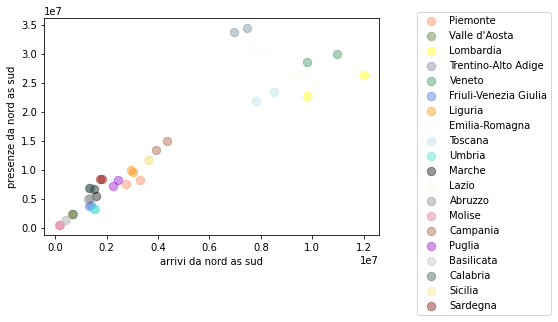

In [25]:
from random import sample
import matplotlib.pyplot as plt
import matplotlib.colors as pltc




# scatter setup
rl = df_alberghi[mask_2008]["Regione"].to_numpy() 
rc = sample([k for k,v in pltc.cnames.items()], rl.size)

for i in range(rl.size):
  plt.scatter(arrivi_2008[i], presenze_2008[i],  c=rc[i], alpha=0.4, s=70, label=rl[i])
  plt.scatter(arrivi_2011[i], presenze_2011[i],  c=rc[i], alpha=0.4, s=70)

# plot setup

plt.xscale('linear')
plt.yscale('linear')
rl = df_alberghi[mask_2008]["Regione"].to_numpy() 

plt.xlabel('arrivi da nord as sud')
plt.ylabel('presenze da nord as sud')
plt.legend(bbox_to_anchor=(1.1, 1.05))

# draw
plt.show()




---



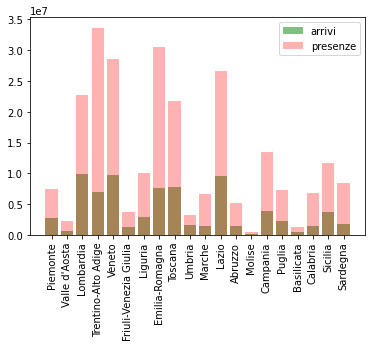

In [18]:
# otrogramma
plt.bar(rl, arrivi_2008,  color="green", alpha=0.5, label="arrivi")
plt.bar(rl, presenze_2008, color="red", alpha=0.3,label="presenze")
plt.xticks(rotation=90)
plt.autoscale()

plt.legend()
plt.show()



